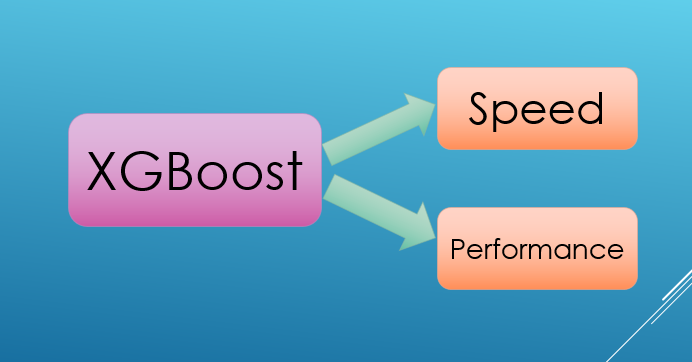

In [46]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
Image("C:\\Users\\User\\Desktop\\XGB.png")



In [93]:
# Importing needed packages
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
#Importing various models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [99]:
# loading  data from csv
mydata = loadtxt('C:\\Users\\User\\Desktop\\pima-indians-diabetes.csv', delimiter=",")

# spliting data into independent and dependent features
Independent_features = mydata[:,0:8]
Dependent_features = mydata[:,8]


In [100]:
import pandas as pd
pd.DataFrame(mydata).shape

(768, 9)

In [101]:
# split data into train and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(Independent_features, Dependent_features, test_size=0.20, random_state=seed)

In [107]:
#Running various models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB',XGBClassifier(eta=0.01,gamma=10))) #eta = 0.01,gamma = 10

import time

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("--- %s seconds ---" % (time.time() - start_time))
    


Accuracy: 77.92% LogisticRegression
--- 0.011991262435913086 seconds ---
Accuracy: 73.38% KNN
--- 0.02698373794555664 seconds ---
Accuracy: 64.29% SVM
--- 0.12592101097106934 seconds ---
Accuracy: 78.57% XGB
--- 0.2278916835784912 seconds ---
